In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/trafficSignClassification

/content/drive/MyDrive/trafficSignClassification


# Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

# Assigning path for dataset

In [ ]:
train_path = 'trafficSignDataset/tsrd-train'
test_path = 'trafficSignDataset/tsrd-test'



# Finding total classes

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

58

In [ ]:
# Label Overview
classes = { 0:'class 0',
            1:'class 1',
            2:'class 2',
            3:'class 3',
            4:'class 4',
            5:'class 5',
            6:'class 6',
            7:'class 7',
            8:'class 8',
            9:'class 9',
            10:'class 10',
            11:'class 11',
            12:'class 12',
            13:'class 13',
            14:'class 14',
            15:'class 15',
            16:'class 16',
            17:'class 17',
            18:'class 18',
            19:'class 19',
            20:'class 20',
            21:'class 21',
            22:'class 22',
            23:'class 23',
            24:'class 24',
            25:'class 25',
            26:'class 26',
            27:'class 27',
            28:'class 28',
            29:'class 29',
            30:'class 30',
            31:'class 31',
            32:'class 32',
            33:'class 33',
            34:'class 34',
            35:'class 35',
            36:'class 36',
            37:'class 37',
            38:'class 38',
            39:'class 39',
            40:'class 40',
            41:'class 41',
            42:'class 42',
            43:'class 43',
            44:'class 44',
            45:'class 45',
            46:'class 46',
            47:'class 47',
            48:'class 48',
            49:'class 49',
            50:'class 50',
            51:'class 51',
            52:'class 52',
            53:'class 53',
            54:'class 54',
            55:'class 55',
            56:'class 56',
            57:'class 57'
            }

# Visualize the dataset

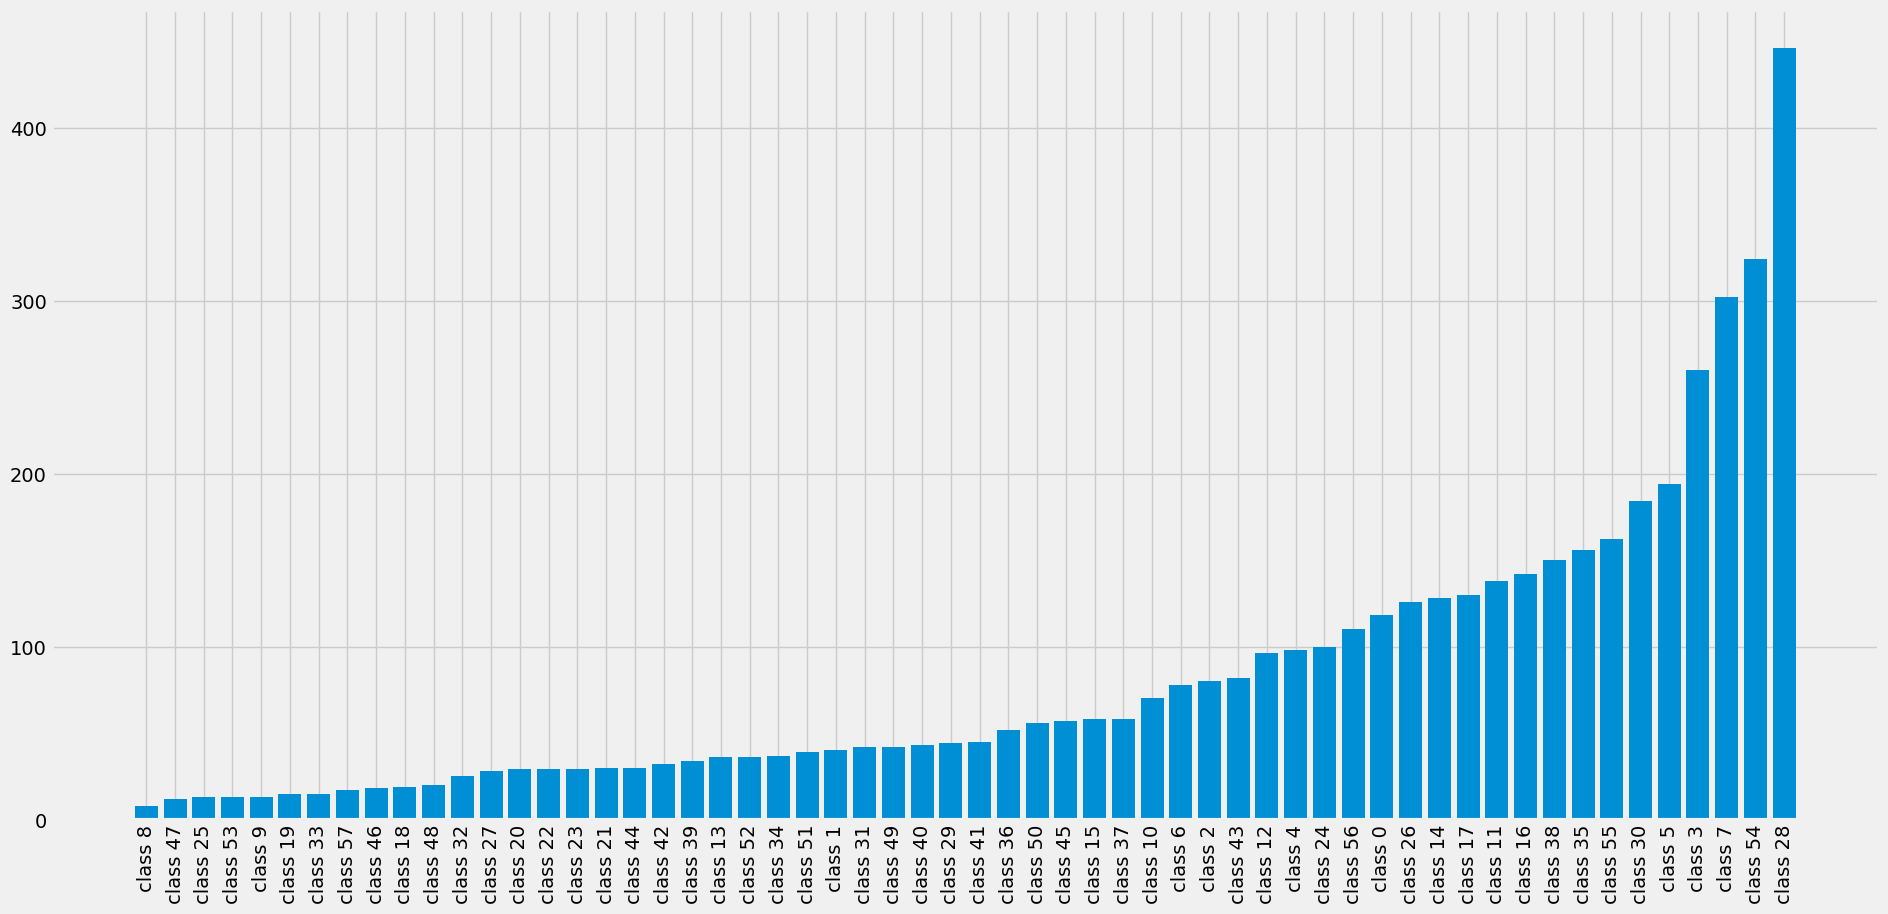

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
# Visualizing 25 random images from train data
import random
from matplotlib.image import imread

train = pd.read_csv('trainingAnnotation_addedAug_v2.csv')
imgs = train["file_name"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)

    randomFile = random.choice(imgs)
    classNo = int(randomFile[1:3])


    random_img_path = 'trafficSignDataset/tsrd-train/' + str(classNo) + '/' + randomFile
    rand_img = plt.imread(random_img_path)
    plt.imshow(rand_img)
    # plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

Output hidden; open in https://colab.research.google.com to view.

# Collecting the training data

In [ ]:
image_data = []
image_labels = []

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

for i in range(NUM_CATEGORIES):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(4788, 30, 30, 3) (4788,)


# Shuffling the training data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

# Splitting the data into train and validation set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (3351, 30, 30, 3)
X_valid.shape (1437, 30, 30, 3)
y_train.shape (3351,)
y_valid.shape (1437,)


# One hot encoding the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(3351, 58)
(1437, 58)


# Model construction

In [ ]:
model = keras.models.Sequential([

    #CNN Layers
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),


    #ANN FC Layers
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(58, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# Augmenting the data and training the model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
105/105 [==============================] - 6s 47ms/step - loss: 2.5861 - accuracy: 0.4020 - val_loss: 3.9245 - val_accuracy: 0.0779
Epoch 2/30
105/105 [==============================] - 2s 22ms/step - loss: 1.3505 - accuracy: 0.6165 - val_loss: 4.0142 - val_accuracy: 0.1454
Epoch 3/30
105/105 [==============================] - 2s 23ms/step - loss: 0.9187 - accuracy: 0.7281 - val_loss: 3.7006 - val_accuracy: 0.1510
Epoch 4/30
105/105 [==============================] - 3s 25ms/step - loss: 0.7243 - accuracy: 0.7860 - val_loss: 1.5981 - val_accuracy: 0.5219
Epoch 5/30
105/105 [==============================] - 3s 24ms/step - loss: 0.5374 - accuracy: 0.8377 - val_loss: 0.9492 - val_accuracy: 0.7070
Epoch 6/30
105/105 [==============================] - 5s 45ms/step - loss: 0.4919 - accuracy: 0.8547 - val_loss: 0.6068 - val_accuracy: 0.8191
Epoch 7/30
105/105 [==============================] - 2s 23ms/step - loss: 0.3680 - accuracy: 0.8866 - val_loss: 0.3215 - val_accuracy: 0.9095

In [ ]:
model.save("model(addedAug_v5(30by30)).h5")


# Evaluating the model

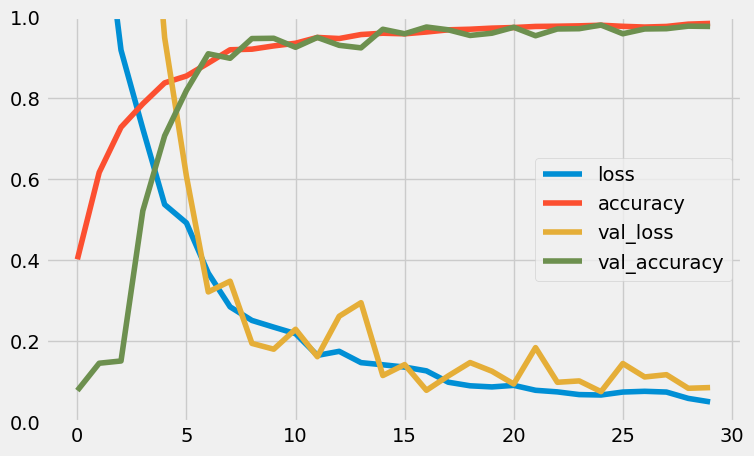

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('model(40by40).h5')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 128)        

# Load the test data and run predictions

In [ ]:
test = pd.read_csv('testingAnnotation_addedAug.csv')

labels = test["category"].values
imgs = test["file_name"].values

data =[]

for img in imgs:

    classNo = int(img[1:3])

    try:
        image = cv2.imread('trafficSignDataset/tsrd-test/' + str(classNo) + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

68/68 [==============================] - 0s 2ms/step
Test Data accuracy:  82.55813953488372


In [ ]:
print(labels[:35])
print(pred[:35])

[0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 0 0 0 0 0 0 7 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2]


In [ ]:
np.unique(labels)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [ ]:
len(np.unique(labels))


58

# Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
len(classes)

58

In [ ]:
cf.shape

(58, 58)

<Axes: >

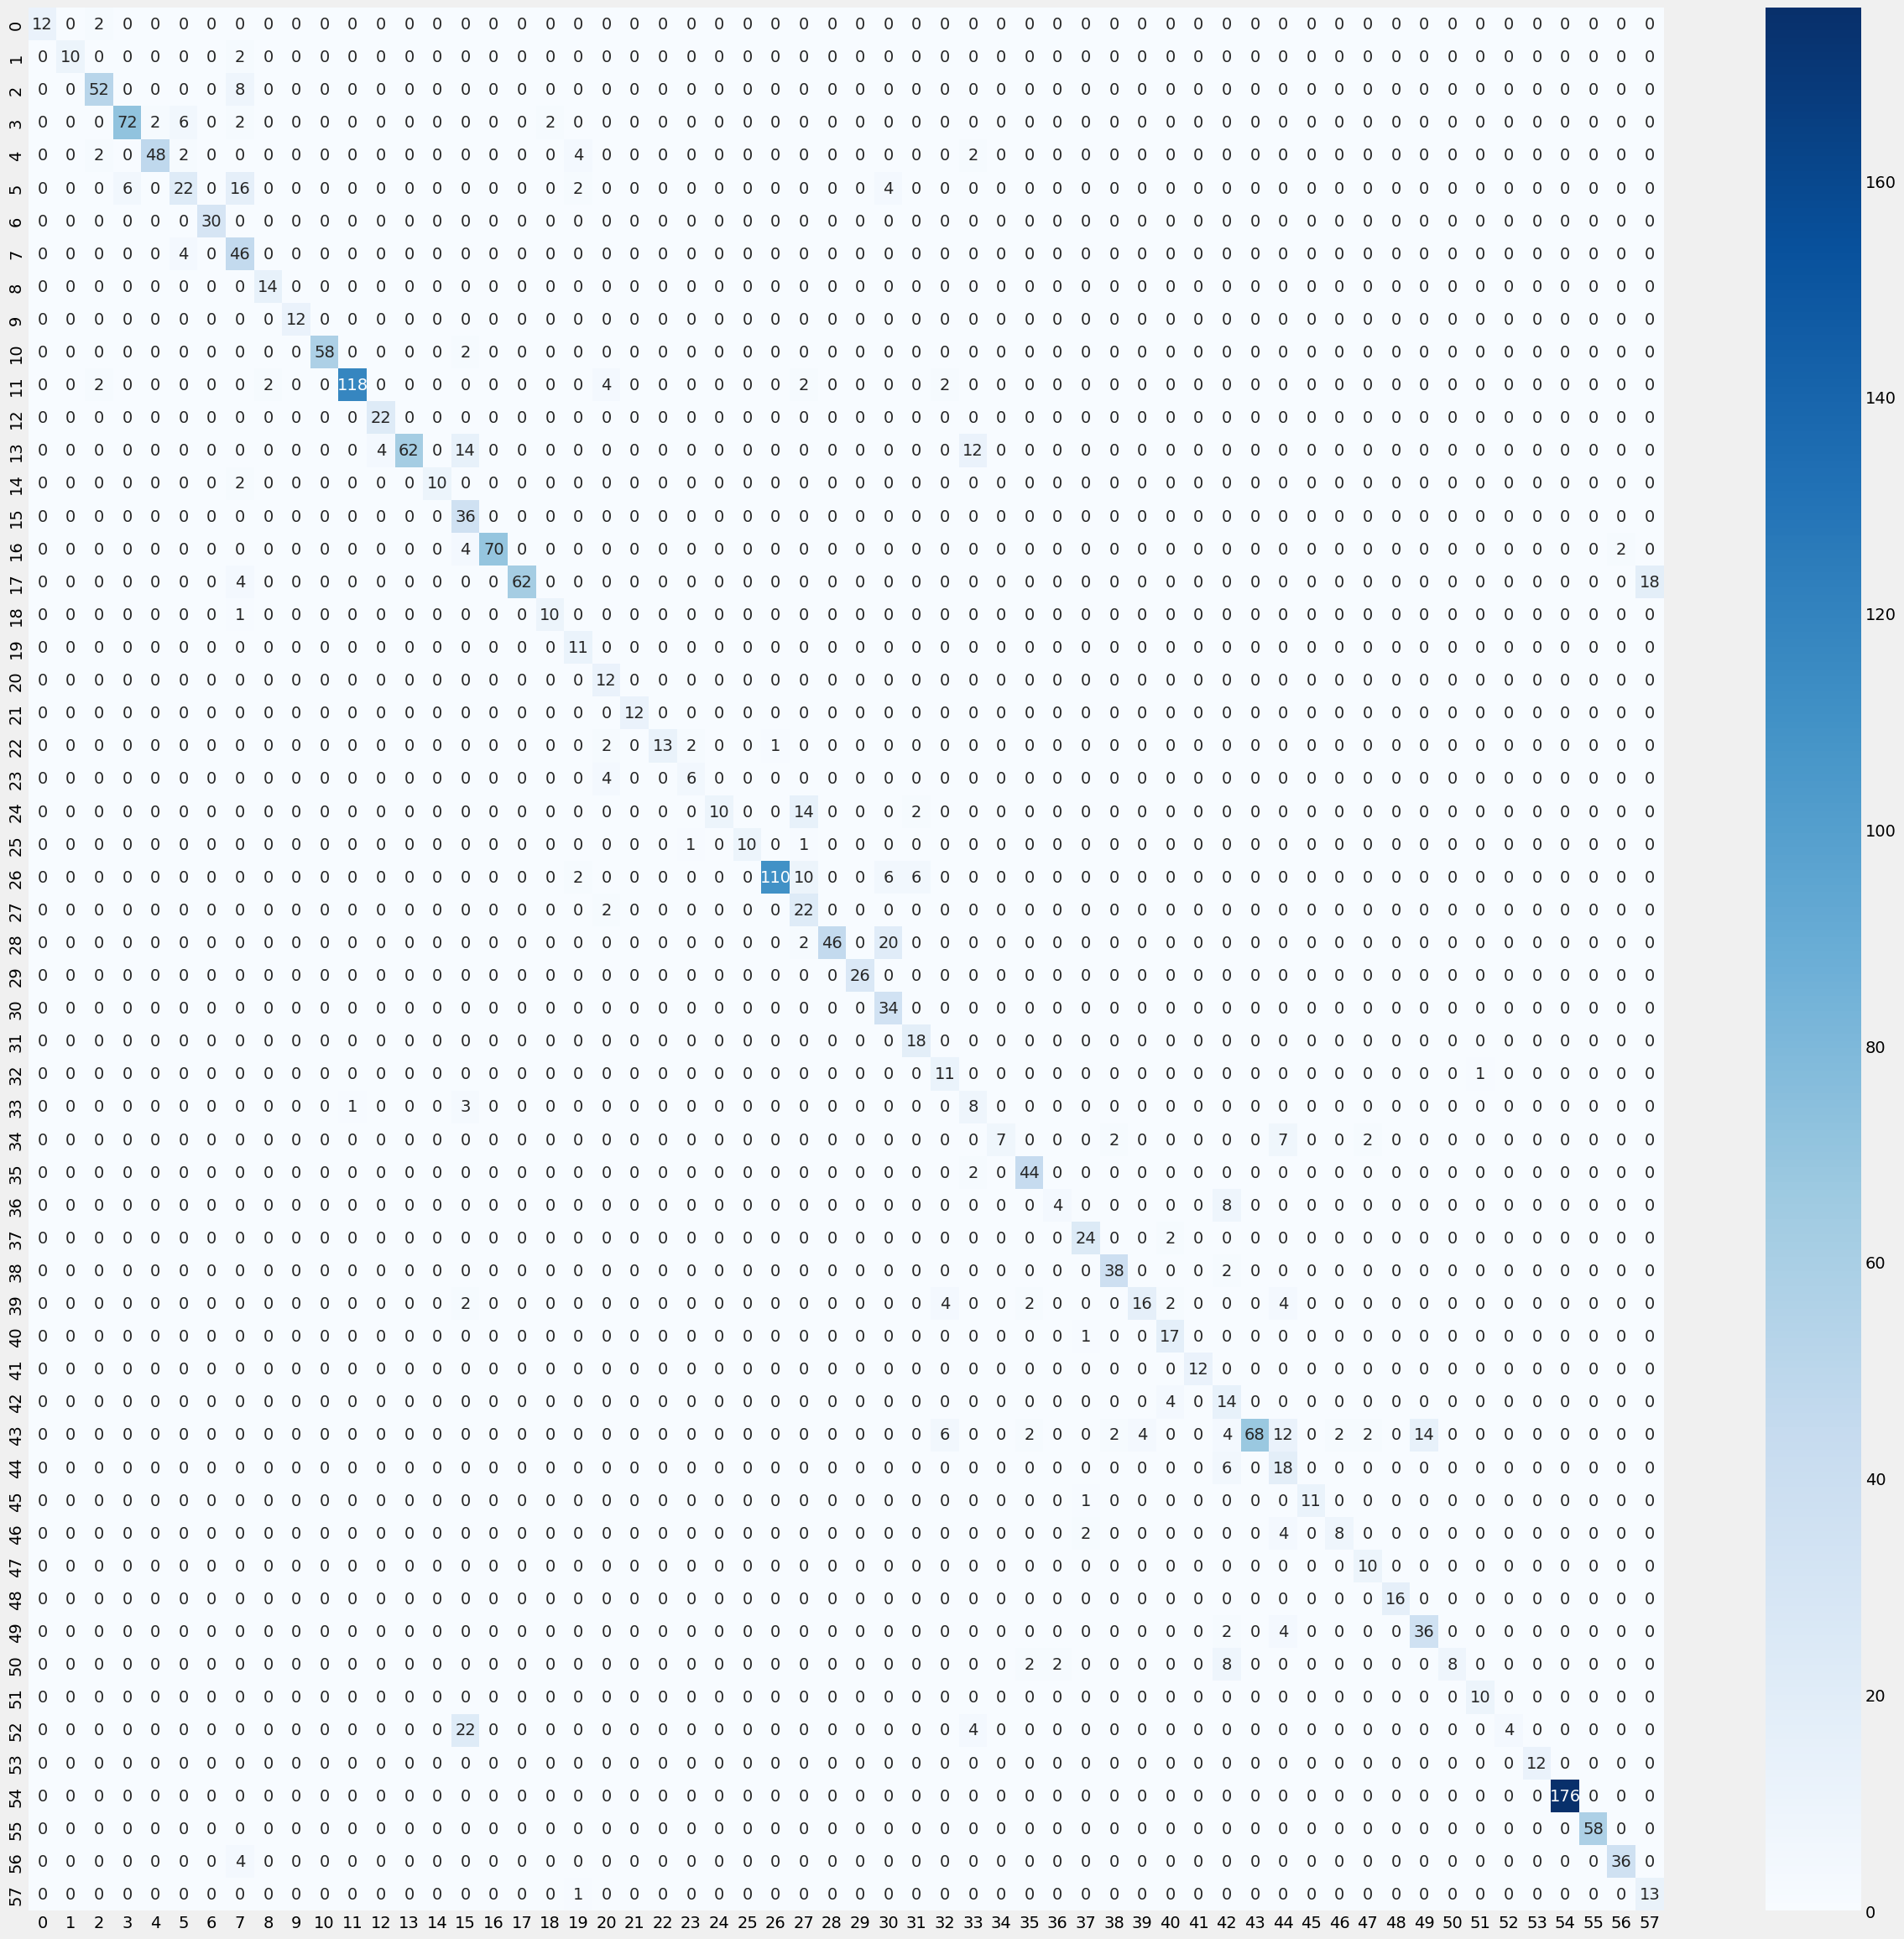

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (28,28))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       1.00      0.83      0.91        12
           2       0.90      0.87      0.88        60
           3       0.92      0.86      0.89        84
           4       0.96      0.83      0.89        58
           5       0.65      0.44      0.52        50
           6       1.00      1.00      1.00        30
           7       0.54      0.92      0.68        50
           8       0.88      1.00      0.93        14
           9       1.00      1.00      1.00        12
          10       1.00      0.97      0.98        60
          11       0.99      0.91      0.95       130
          12       0.85      1.00      0.92        22
          13       1.00      0.67      0.81        92
          14       1.00      0.83      0.91        12
          15       0.43      1.00      0.61        36
          16       1.00      0.92      0.96        76
          17       1.00    

# Prediction on test data

In [ ]:
plt.figure(figsize = (30, 550))

start_index = 0
for i in range(2150):
    plt.subplot(215, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

Output hidden; open in https://colab.research.google.com to view.